# Imports

In [1]:
import pandas as pd
import numpy as np

# EDA


In [2]:
df = pd.read_excel('online_retail_data.xlsx')
print(df.shape)
df.head()

(541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
# save a backup copy of our dataframe
df_copy = df.copy()

> let's see the geographical regions that we're dealing with

In [4]:
df.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

> Let's view the data from a Customer perspective

In [5]:
customer_data = df.set_index(['CustomerID', 'InvoiceNo'])
print(customer_data.shape)
customer_data.head(30)

(541909, 6)


StockCode                          Description  Quantity  \
CustomerID InvoiceNo                                                            
17850.0    536365       85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
           536365        71053                  WHITE METAL LANTERN         6   
           536365       84406B       CREAM CUPID HEARTS COAT HANGER         8   
           536365       84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
           536365       84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
           536365        22752         SET 7 BABUSHKA NESTING BOXES         2   
           536365        21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
           536366        22633               HAND WARMER UNION JACK         6   
           536366        22632            HAND WARMER RED POLKA DOT         6   
13047.0    536367        84879        ASSORTED COLOUR BIRD ORNAMENT        32   
           536367        22745           POPPY'S PLAYHOUSE BEDROOM          6   
           536367        22748            POPPY'S PLAYHOUSE KITCHEN         6   
           536367        22749    FELTCRAFT PRINCESS CHARLOTTE DOLL         8   
           536367        22310              IVORY KNITTED MUG COSY          6   
           536367        84969   BOX OF 6 ASSORTED COLOUR TEASPOONS         6   
           536367        22623        BOX OF VINTAGE JIGSAW BLOCKS          3   
           536367        22622       BOX OF VINTAGE ALPHABET BLOCKS         2   
           536367        21754             HOME BUILDING BLOCK WORD         3   
           536367        21755             LOVE BUILDING BLOCK WORD         3   
           536367        21777          RECIPE BOX WITH METAL HEART         4   
           536367        48187                  DOORMAT NEW ENGLAND         4   
           536368        22960             JAM MAKING SET WITH JARS         6   
           536368        22913          RED COAT RACK PARIS FASHION         3   
           536368        22912       YELLOW COAT RACK PARIS FASHION         3   
           536368        22914         BLUE COAT RACK PARIS FASHION         3   
           536369        21756             BATH BUILDING BLOCK WORD         3   
12583.0    536370        22728            ALARM CLOCK BAKELIKE PINK        24   
           536370        22727            ALARM CLOCK BAKELIKE RED         24   
           536370        22726           ALARM CLOCK BAKELIKE GREEN        12   
           536370        21724      PANDA AND BUNNIES STICKER SHEET        12   

                             InvoiceDate  UnitPrice         Country  
CustomerID InvoiceNo                                                 
17850.0    536365    2010-12-01 08:26:00       2.55  United Kingdom  
           536365    2010-12-01 08:26:00       3.39  United Kingdom  
           536365    2010-12-01 08:26:00       2.75  United Kingdom  
           536365    2010-12-01 08:26:00       3.39  United Kingdom  
           536365    2010-12-01 08:26:00       3.39  United Kingdom  
           536365    2010-12-01 08:26:00       7.65  United Kingdom  
           536365    2010-12-01 08:26:00       4.25  United Kingdom  
           536366    2010-12-01 08:28:00       1.85  United Kingdom  
           536366    2010-12-01 08:28:00       1.85  United Kingdom  
13047.0    536367    2010-12-01 08:34:00       1.69  United Kingdom  
           536367    2010-12-01 08:34:00       2.10  United Kingdom  
           536367    2010-12-01 08:34:00       2.10  United Kingdom  
           536367    2010-12-01 08:34:00       3.75  United Kingdom  
           536367    2010-12-01 08:34:00       1.65  United Kingdom  
           536367    2010-12-01 08:34:00       4.25  United Kingdom  
           536367    2010-12-01 08:34:00       4.95  United Kingdom  
           536367    2010-12-01 08:34:00       9.95  United Kingdom  
           536367    2010-12-01 08:34:00       5.95  United Kingdom  
           536367    2010-12

In [6]:
len(df.CustomerID.unique())

4373

# Data Discovery

- 4372 Unique CustomerID values
- 25900 Unique InvoiceNo values
- 4070 Unique StockCode values
- 38970 max unit price
- 0.03 min unit price
- 9,287 returns
- date range is (2010-12-01 to 2011-12-09)

 # Data Cleaning / Wrangling / Transformations

> Let's first clean up the dataset by removing uncessary observations, observations without a customer ID (our clustering target) etc...

In [7]:
df[df.StockCode == 'B']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [8]:
df = df[df.StockCode != 'B']

> A few items that are priced less than 0.01 and the quantity doesn't bring them to 0.01 will also be dropped

In [9]:
df = df[df.UnitPrice > .01]

> Restrict the dataset to one full year of transaction data

In [10]:
df.InvoiceDate.min()

Timestamp('2010-12-01 08:26:00')

In [11]:
df.InvoiceDate.max()

Timestamp('2011-12-09 12:50:00')

In [12]:
df = df[df['InvoiceDate'] <= '2011-12-01 23:59:59']

In [13]:
df.InvoiceDate.max()

Timestamp('2011-12-01 19:54:00')

> Remove observations without a Customer ID

In [14]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     125466
Country             0
dtype: int64

In [15]:
df = df[np.isfinite(df['CustomerID'])]
print(df.shape)

(391349, 8)


> Add total revenue per Unit for future computations

In [16]:
df['TotalRevenue'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalRevenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


# Feature Engineering: "RFM" Variables (Recency, Frequency, MonetaryValue)

The original dataset was organized long, with invoices nested within customer and observations given as transactions.  We will now create a customer-level dataset and add add recency, frequency, and monetary value data to it . The `Recency` variable refers to the number of days that have elapsed since the customer last purchased something (so, smaller numbers indicate more recent activity on the customer’s account). `Frequency` refers to the number of invoices with purchases during the year. `MonetaryValue` is the amount that the customer spent during the year. Some customers have negative monetary values. These customers probably returned something during the year that they had purchased before the year started, so we reset their monetary value to zero.  We will also aggregate the `TotalQuantity` of items each customer purchased over the year, and feed that into our clustering model.  Let's extract the data we need at the customer level

> Total quantity of items purchased

In [17]:
total_quantity = df.groupby(['CustomerID'], as_index=False).Quantity.sum()
total_quantity.head()

,CustomerID,Quantity
0,12346.0,0
1,12347.0,2266
2,12348.0,2341
3,12349.0,631
4,12350.0,197


> Recency

In [18]:
# find number of days since last purchase by substracting invoice date from last day of the fiscal year
df['Recency'] = df['InvoiceDate'].max() - df['InvoiceDate']
df.head(30)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalRevenue,Recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,365 days 11:28:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,365 days 11:28:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,365 days 11:28:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,365 days 11:28:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,365 days 11:28:00
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30,365 days 11:28:00
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50,365 days 11:28:00
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,365 days 11:26:00
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,365 days 11:26:00
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,365 days 11:20:00


In [19]:
# get time since most recent purchase
recency = df.groupby(['CustomerID'], as_index=False)['Recency'].min() 
print(recency.dtypes)
recency.head()

CustomerID            float64
Recency       timedelta64[ns]
dtype: object


,CustomerID,Recency
0,12346.0,317 days 09:37:00
1,12347.0,31 days 07:29:00
2,12348.0,67 days 06:41:00
3,12349.0,10 days 10:03:00
4,12350.0,302 days 03:53:00


In [20]:
# change timedelta to days (dtype int)
recency['Recency'] = recency['Recency'] / np.timedelta64(1, 'D')

In [21]:
recency['Recency'] = recency['Recency'].astype(int)
recency['Recency'].head()

0    317
1     31
2     67
3     10
4    302
Name: Recency, dtype: int64

> Frequency

In [22]:
frequency = df.groupby(['CustomerID'], as_index=False).InvoiceNo.count()
frequency.head()

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,171
2,12348.0,31
3,12349.0,73
4,12350.0,17


> Customer Monetary Value

In [23]:
# total spend of each customer
monetary_value = df.groupby('CustomerID', as_index=False).TotalRevenue.sum()
monetary_value['TotalRevenue'] = round(monetary_value['TotalRevenue'], 2)
monetary_value.head()

,CustomerID,TotalRevenue
0,12346.0,0.00
1,12347.0,4085.18
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


> __Customer-Level Data:__  we can now merge our dataframes to work with the data at the customer level

In [24]:
dfs = [recency, frequency, monetary_value]

for df in dfs:
    df = df.drop(['CustomerID'], inplace=True, axis=1)

customer_level_data = pd.concat([total_quantity, recency, frequency, monetary_value], axis=1)
customer_level_data.columns = ['CustomerID', 'TotalQuantity', 'Recency', 'Frequency', 'MonetaryValue']
customer_level_data.head(10)

,CustomerID,TotalQuantity,Recency,Frequency,MonetaryValue
0,12346.0,0,317,2,0.00
1,12347.0,2266,31,171,4085.18
2,12348.0,2341,67,31,1797.24
3,12349.0,631,10,73,1757.55
4,12350.0,197,302,17,334.40
5,12352.0,470,28,95,1545.41
6,12353.0,20,196,4,89.00
7,12354.0,530,224,58,1079.40
8,12355.0,240,206,13,459.40
9,12356.0,1591,14,59,2811.43


In [25]:
customer_level_data_raw = customer_level_data.copy() # copy raw (unlogged, unscaled, no PCA) for future computations

In [26]:
customer_level_data.set_index('CustomerID', inplace=True)
customer_level_data.head()

,TotalQuantity,Recency,Frequency,MonetaryValue
CustomerID,,,,
12346.0,0,317,2,0.00
12347.0,2266,31,171,4085.18
12348.0,2341,67,31,1797.24
12349.0,631,10,73,1757.55
12350.0,197,302,17,334.40


In [27]:
# customer_level_data['TotalQuantity'] = np.log(customer_level_data['TotalQuantity'])
# customer_level_data['Recency'] = np.log(customer_level_data['Recency'])
# customer_level_data['Frequency'] = np.log(customer_level_data['Frequency'])

# customer_level_data['MonetaryValue'] = customer_level_data['MonetaryValue'] + 0.1
# customer_level_data['MonetaryValue'] = np.log(customer_level_data['MonetaryValue'])

# Clustering Pipelines - Applying Unsupervised Machine Learning

In [28]:
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn import metrics
from sklearn.metrics.cluster import calinski_harabasz_score, adjusted_rand_score

import matplotlib.pyplot as plt
%matplotlib inline

> Let's create 2 pipelines: one for K-Means Clustering, one for Hierarchical Agglomerative Clustering

In [29]:
# c = None
# k = None
# k_max = None # maximum no. of clusters will will evaluate

pipe_kmeans = Pipeline([('scl', StandardScaler()),
            ('pca', PCA(n_components=2)),  # change value of c for # of PCA components
            ('clf', KMeans(n_clusters=3))]) # value of k changes in loop

pipe_HAC = Pipeline([('scl', StandardScaler()),
            ('pca', PCA(n_components=2)), # see above
            ('clf', AgglomerativeClustering(n_clusters=3))]) # see above

> Now let's pass our data through the K-means pipeline, visually graph clusters, and interpret results

In [30]:
#  def processKmeans(k_max, df):
#     # fit and predict clusters
#     for k in range(0, k_max):
#         pipe_kmeans.fit(df)
#         cluster_preds = pipe_kmeans.predict(df)
#         print(f'K-Means Solution with {k} clusters')
#         print('Calinski-Harabaz (CA) cluster variance score: ', calinski_harabaz_score(df, cluster_preds))
#         print('\n')

#         plt.title(f'K-Means Solution with {k} clusters')
#         plt.scatter(X.Frequency, X.MonetaryValue, c=cluster_preds, s=10)
#         cl_centers = pipe_kmeans.cluster_centers_
#         plt.scatter(cl_centers[:, 0], cl_centers[:, 1], c='black', s=30); # ! check on this centering selection

#     # merge cluster predicitons to unlogged, unscaled df and print summary stats by cluster
#     customer_level_data_raw['Cluster'] = cluster_preds
#     for cluster in set(cluster_preds):
#         print(f'Summary Stats for cluster # {cluster}')
#         customer_level_data_raw[customer_level_data_raw['Cluster'] == cluster][['TotalQuantity', 'Recency', 'Frequency', 'MonetaryValue']].describe()
#         pop_perc = (len(customer_level_data_raw[customer_level_data_raw['Cluster'] == cluster]) / len(customer_level_data_raw))*100
#         rev_perc = (sum(customer_level_data_raw[customer_level_data_raw['Cluster'] == cluster].MonetaryValue) / sum(customer_level_data_raw.MonetaryValue))*100               
#         total_spend = sum(customer_level_data_raw[customer_level_data_raw['Cluster'] == cluster].MonetaryValue)
#         print(f'This cluster represents {pop_perc}% of the population and {rev_perc}% or Total Revenue, with a total spend of {total_spend}')
#         print('\n\n\n')
        

In [31]:
# processKmeans(3, customer_level_data)

K-Means Solution with 3 clusters
-----------------------
Calinski-Harabaz (CA) Cluster Variance Ration score:  2802.42357343456
Cluster Silhouette score:  -0.10995982744898215


Summary Stats for cluster # 0
       TotalQuantity      Recency    Frequency  MonetaryValue
count    3177.000000  3177.000000  3177.000000    3177.000000
mean     1119.226314    37.359144   102.548631    1870.119308
std      2176.797705    34.192904   141.601446    3492.739840
min      -189.000000     0.000000     1.000000   -1165.300000
25%       229.000000    10.000000    25.000000     398.840000
50%       530.000000    27.000000    57.000000     901.210000
75%      1200.000000    57.000000   124.000000    2005.630000
max     33312.000000   161.000000  2681.000000   50992.610000
This cluster represents 73.32% of the population and 74.25% of Total Revenue, with a total spend of £5941369.04




Summary Stats for cluster # 1
       TotalQuantity     Recency    Frequency  MonetaryValue
count    1141.000000  1141.

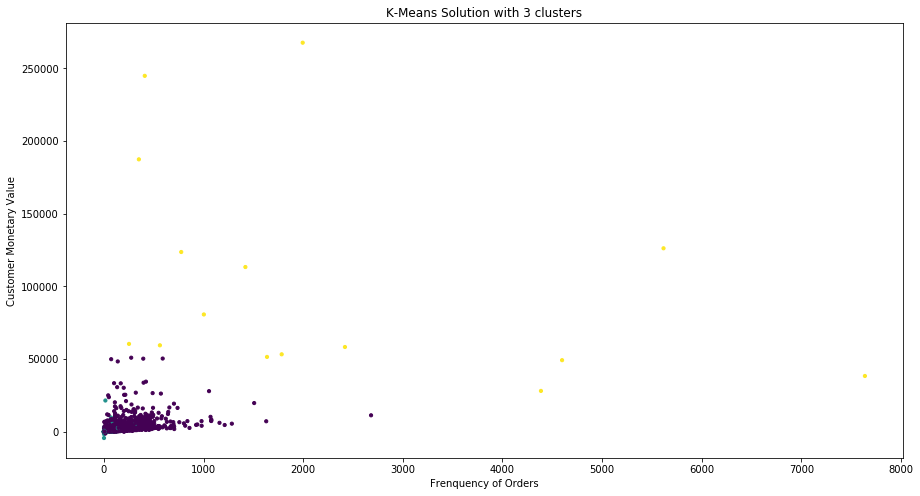

In [32]:
pipe_kmeans.fit(customer_level_data)
cluster_preds = pipe_kmeans.predict(customer_level_data)
# print(cluster_preds)
# print(set(cluster_preds))

print(f'K-Means Solution with 3 clusters\n-----------------------')
print('Calinski-Harabaz (CA) Cluster Variance Ration score: ', calinski_harabasz_score(customer_level_data, cluster_preds))
print('Cluster Silhouette score: ', metrics.silhouette_score(customer_level_data, cluster_preds))
print('\n')

plt.figure(figsize=(15, 8))
plt.title(f'K-Means Solution with 3 clusters')
plt.xlabel("Frenquency of Orders")
plt.ylabel("Customer Monetary Value")
plt.scatter(customer_level_data.Frequency, customer_level_data.MonetaryValue, c=cluster_preds, s=10)
# cl_centers = pipe_kmeans.cluster_centers_
# plt.scatter(cl_centers[:, 0], cl_centers[:, 1], c='black', s=30); # ! check on this centering selection

# merge cluster predicitons to unlogged, unscaled df and print summary stats by cluster
customer_level_data_raw['Cluster'] = cluster_preds
for cluster in set(cluster_preds):
    print(f'Summary Stats for cluster # {cluster}')
    print(customer_level_data_raw[customer_level_data_raw['Cluster'] == cluster][['TotalQuantity', 'Recency', 'Frequency', 'MonetaryValue']].describe())
    pop_perc = round((len(customer_level_data_raw[customer_level_data_raw['Cluster'] == cluster]) / len(customer_level_data_raw))*100, 2)
    rev_perc = round((sum(customer_level_data_raw[customer_level_data_raw['Cluster'] == cluster].MonetaryValue) / sum(customer_level_data_raw.MonetaryValue))*100, 2)               
    total_spend = round(sum(customer_level_data_raw[customer_level_data_raw['Cluster'] == cluster].MonetaryValue), 2)
    print(f'This cluster represents {pop_perc}% of the population and {rev_perc}% of Total Revenue, with a total spend of £{total_spend}')
    print('\n\n\n')
        
        
        
        
        
        

In [33]:
# def processHAC(k_max, df):
#     # fit and predict clusters
#     for k in range(0, k_max):
#         pipe_HAC.fit(df)
#         cluster_preds = pipe_HAC.predict(df)
#         print(f'K-Means Solution with {k} clusters')
#         print('Calinski-Harabaz (CA) cluster variance score: ', calinski_harabaz_score(df, cluster_preds))
#         print('Cluster Silhouette score: ', metrics.silhouette_score(customer_level_data, cluster_preds))
#         print('\n')

#         plt.title(f'K-Means Solution with {k} clusters')
#         plt.scatter(X.Frequency, X.MonetaryValue, c=cluster_preds, s=10)
#         cl_centers = pipe_kmeans.cluster_centers_
#         plt.scatter(cl_centers[:, 0], cl_centers[:, 1], c='black', s=30); # ! check on this centering selection
        
#     # merge cluster predicitons to unlogged, unscaled df and print summary stats by cluster
#     customer_level_data_raw['Cluster'] = cluster_preds
#     for cluster in set(cluster_preds):
#         print(f'Summary Stats for cluster # {cluster}')
#         customer_level_data_raw[customer_level_data_raw['Cluster'] == cluster][['TotalQuantity', 'Recency', 'Frequency', 'MonetaryValue']].describe()
#         pop_perc = (len(customer_level_data_raw[customer_level_data_raw['Cluster'] == cluster]) / len(customer_level_data_raw))*100
#         rev_perc = (sum(customer_level_data_raw[customer_level_data_raw['Cluster'] == cluster].MonetaryValue) / sum(customer_level_data_raw.MonetaryValue))*100               
#         total_spend = sum(customer_level_data_raw[customer_level_data_raw['Cluster'] == cluster].MonetaryValue)
#         print(f'This cluster represents {pop_perc}% of the population and {rev_perc}% or Total Revenue, with a total spend of {total_spend}')
#         print('\n\n\n')
        
        
        
        
        
        

In [34]:
from scipy.cluster.hierarchy import dendrogram, ward

Text(0, 0.5, 'Cluster distance')

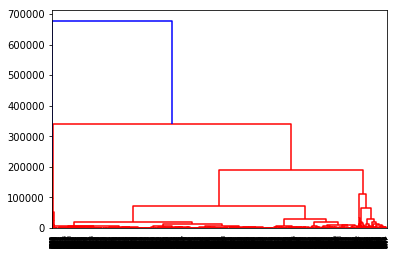

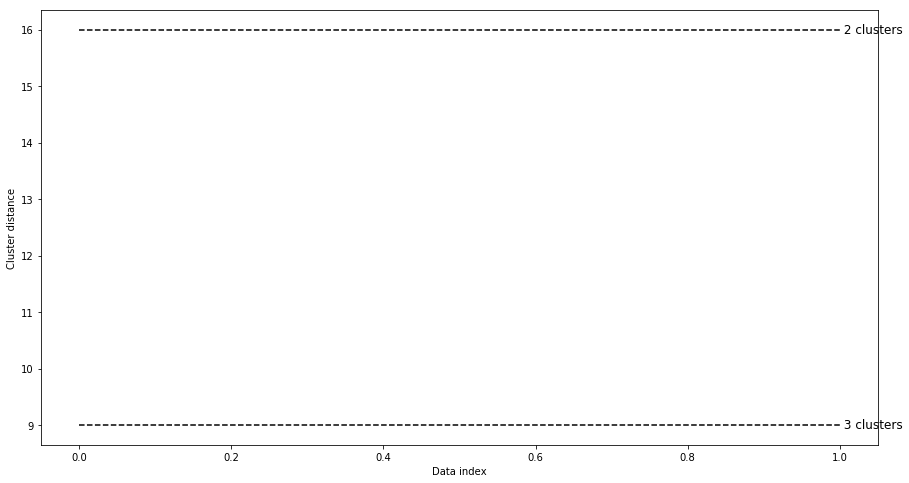

In [35]:
# use the ward() function
linkage_array = ward(customer_level_data)

# Now we plot the dendrogram for the linkage_array containing the distances between clusters
dendrogram(linkage_array)

plt.figure(figsize=(15, 8))
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [16, 16], '--', c='k')
ax.plot(bounds, [9, 9], '--', c='k')
ax.text(bounds[1], 16, ' 2 clusters', va='center', fontdict={'size': 12})
ax.text(bounds[1], 9, ' 3 clusters', va='center', fontdict={'size': 12})
plt.xlabel("Data index")
plt.ylabel("Cluster distance")

In [36]:
agg_comp = AgglomerativeClustering(linkage ="complete", n_clusters=5)
agg_avg = AgglomerativeClustering(linkage ="average", n_clusters=5)
agg_ward = AgglomerativeClustering(linkage ="ward", n_clusters=5)

as_comp_preds = agg_comp.fit_predict(customer_level_data)
as_avg_preds = agg_avg.fit_predict(customer_level_data)
as_ward_preds = agg_ward.fit_predict(customer_level_data)

> Let's see how Agglomerative Clustering with Linkage set to 'complete' compares against K-means clustering

HAC-Complete Solution with 5 clusters
-----------------------
Calinski-Harabaz (CA) Cluster Variance Ration score:  8027.398622136339
Cluster Silhouette score:  0.9565899746671175


Summary Stats for cluster # 0
       TotalQuantity    Recency    Frequency  MonetaryValue
count      19.000000  19.000000    19.000000      19.000000
mean    31957.789474   8.842105  1416.473684   46688.912105
std     13704.324948   9.702595  2036.777803   13787.039088
min     12593.000000   0.000000    43.000000   25079.600000
25%     23495.000000   2.000000   225.500000   34163.535000
50%     28739.000000   3.000000   422.000000   49957.480000
75%     35266.500000  15.000000  1710.500000   52422.950000
max     59363.000000  30.000000  7637.000000   80746.060000
This cluster represents 0.44% of the population and 11.09% of Total Revenue, with a total spend of £887089.33




Summary Stats for cluster # 1
       TotalQuantity  Recency  Frequency  MonetaryValue
count       2.000000  2.00000     2.0000       2

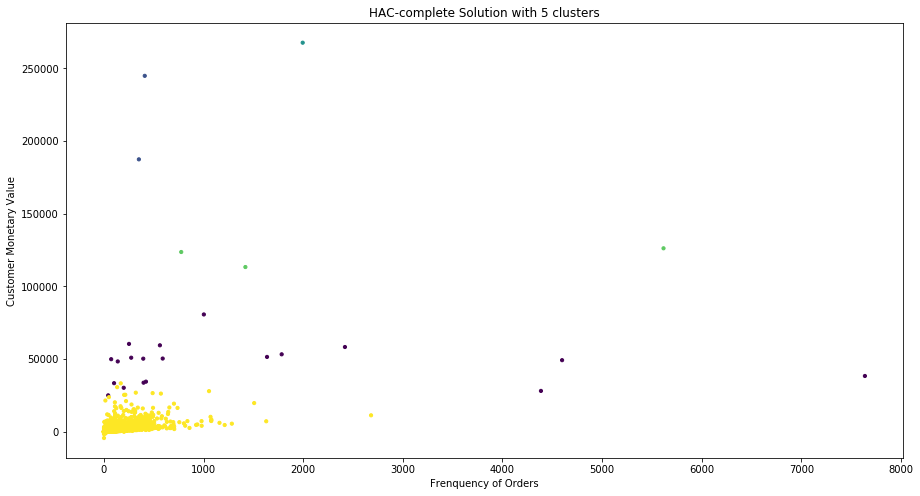

In [37]:
print(f'HAC-Complete Solution with 5 clusters\n-----------------------')
print('Calinski-Harabaz (CA) Cluster Variance Ration score: ', calinski_harabasz_score(customer_level_data, as_comp_preds))
print('Cluster Silhouette score: ', metrics.silhouette_score(customer_level_data, as_comp_preds))
print('\n')

plt.figure(figsize=(15, 8))
plt.title(f'HAC-complete Solution with 5 clusters')
plt.xlabel("Frenquency of Orders")
plt.ylabel("Customer Monetary Value")
plt.scatter(customer_level_data.Frequency, customer_level_data.MonetaryValue, c=as_comp_preds, s=10)

customer_level_data_raw['as_comp_preds'] = as_comp_preds
for cluster in set(as_comp_preds):
    print(f'Summary Stats for cluster # {cluster}')
    print(customer_level_data_raw[customer_level_data_raw['as_comp_preds'] == cluster][['TotalQuantity', 'Recency', 'Frequency', 'MonetaryValue']].describe())
    pop_perc = round((len(customer_level_data_raw[customer_level_data_raw['as_comp_preds'] == cluster]) / len(customer_level_data_raw))*100, 2)
    rev_perc = round((sum(customer_level_data_raw[customer_level_data_raw['as_comp_preds'] == cluster].MonetaryValue) / sum(customer_level_data_raw.MonetaryValue))*100, 2)               
    total_spend = round(sum(customer_level_data_raw[customer_level_data_raw['as_comp_preds'] == cluster].MonetaryValue), 2)
    print(f'This cluster represents {pop_perc}% of the population and {rev_perc}% of Total Revenue, with a total spend of £{total_spend}')
    print('\n\n\n')

In [38]:
from sklearn.model_selection import GridSearchCV

ac = AgglomerativeClustering(memory='/Users/Frankie/_CODE/FLATIRON/dsc-1-01-05-setting-up-environment/_module5/unsupervised_learning_market_segmentation_clustering_applied', 
                             compute_full_tree=True)


classifier = GridSearchCV(ac, 
                          params = {n_clusters: range(2,10),
                                  linkage: ["complete", "ward", "average"]}, 
                          scoring = 'silhouette_score', 
                          n_jobs=-1, verbose=2)
classifier.fit_predict(customer_level_data)





NameError: name 'n_clusters' is not defined

# Insights - What we can say about our customer 

In [ ]:
# what geographical regions are our best customers located, our worst?

In [ ]:
# who is our avergae customer?
# what do they generally order, and in what quantities
# how can we increase those customers frequency of purchace and overall monetary value

In [ ]:
# What are our top 5 items? 
# what are our 10 worse performing items?
# what kind of items are popular among our top tier customers?

# Target Marketing Campaign